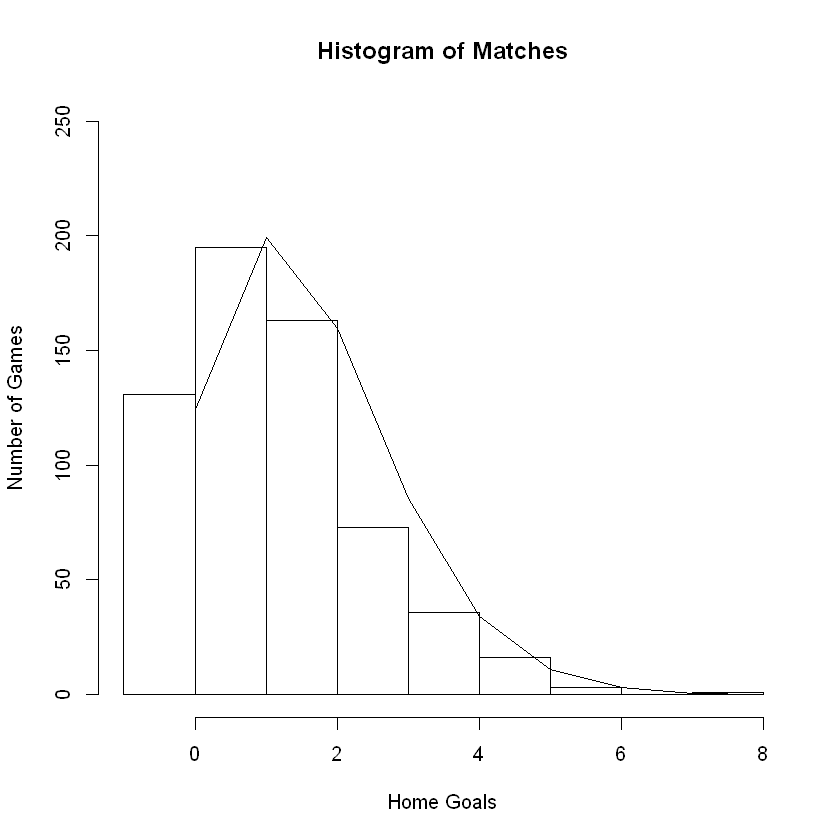

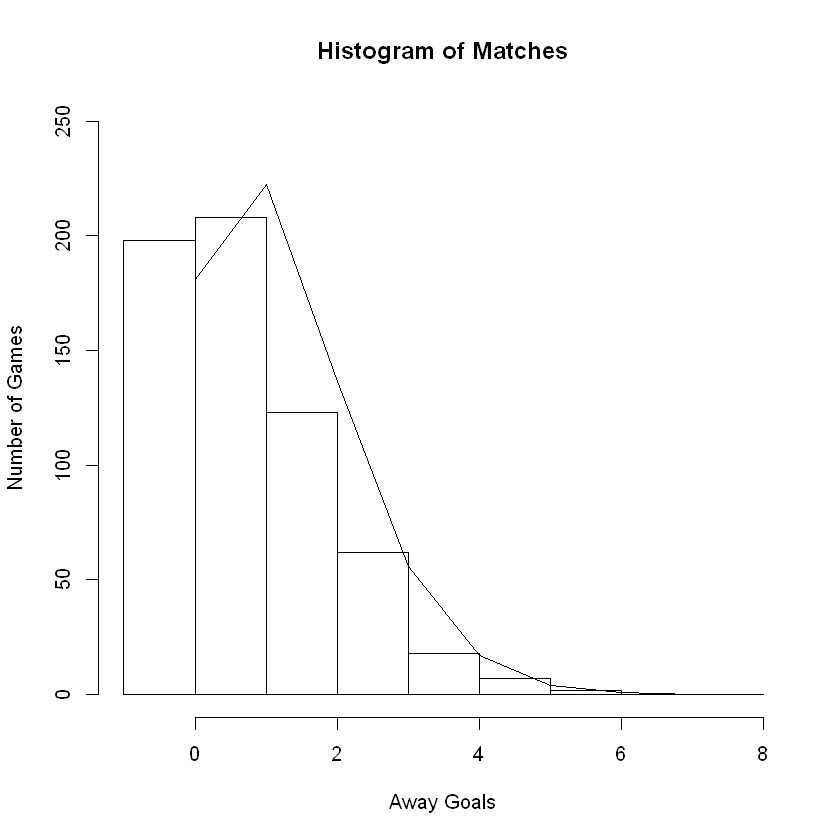

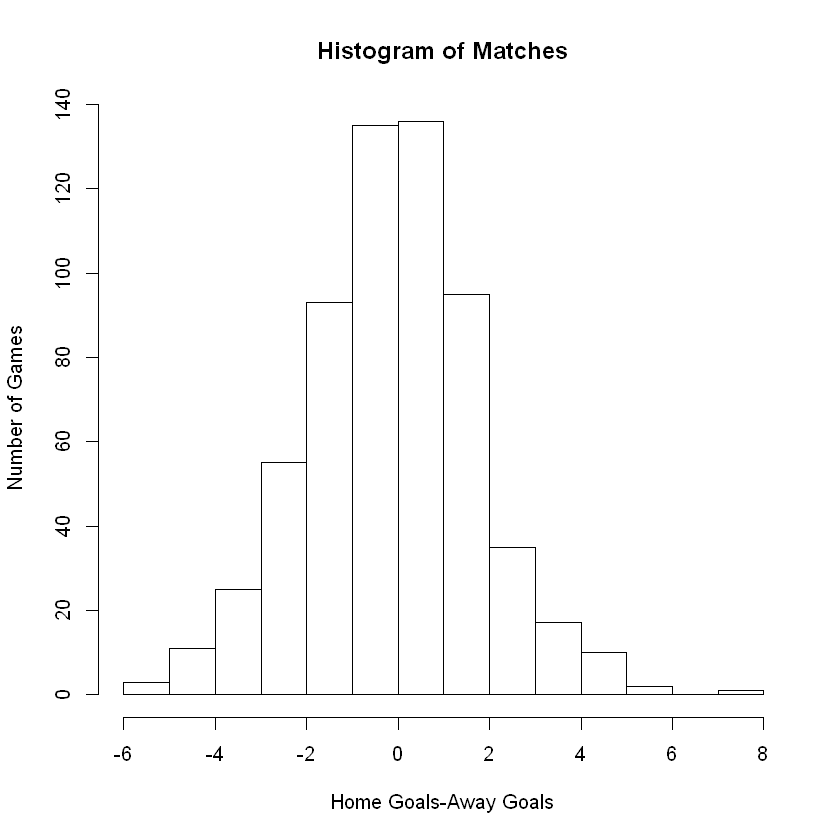

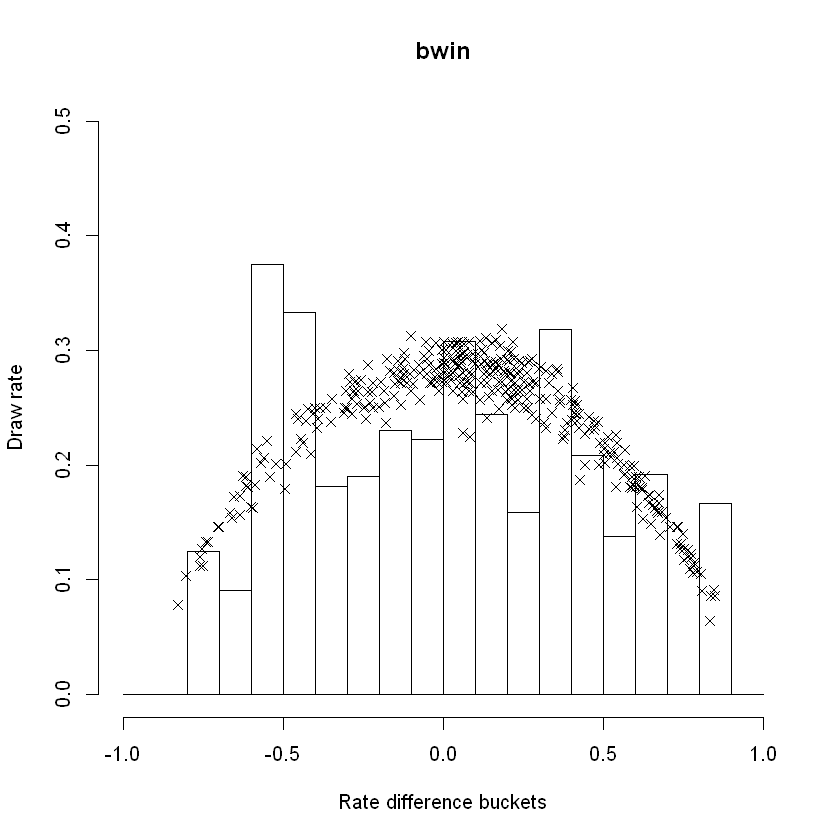

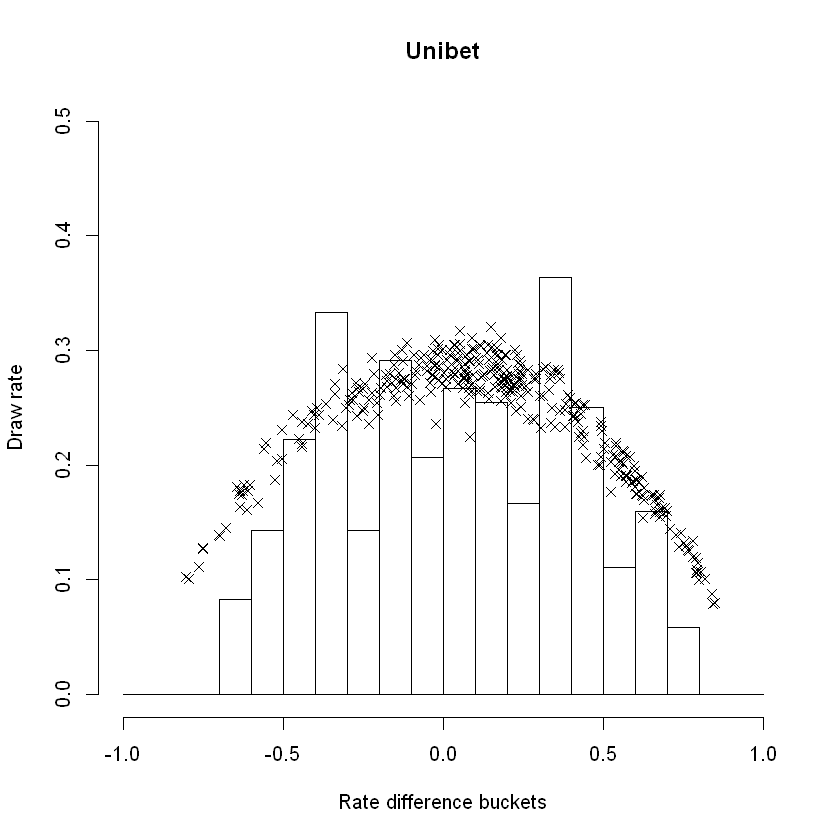

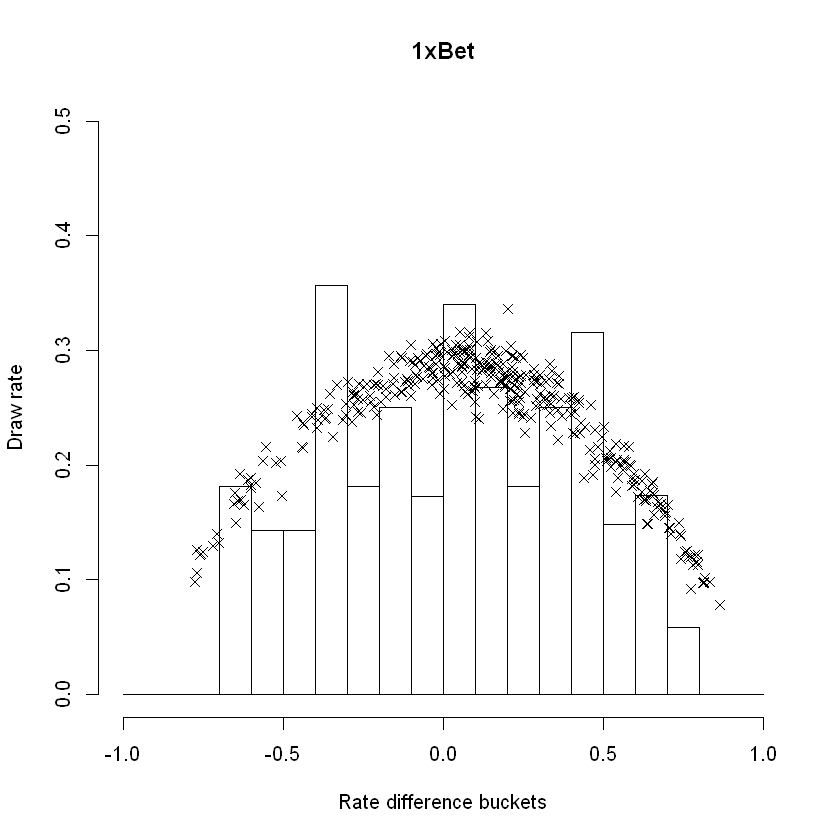

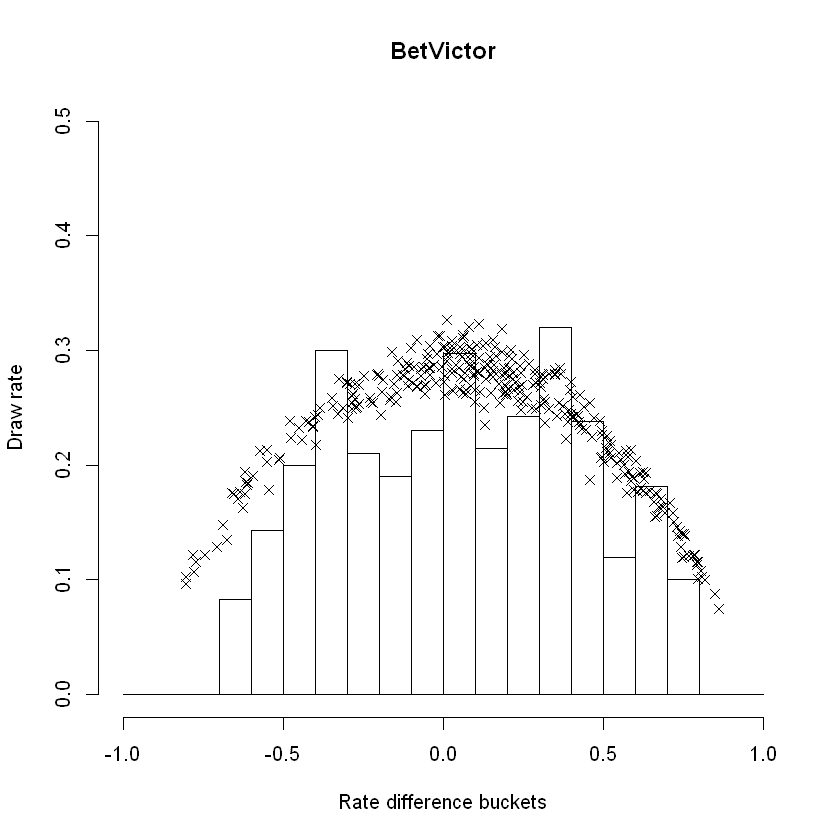

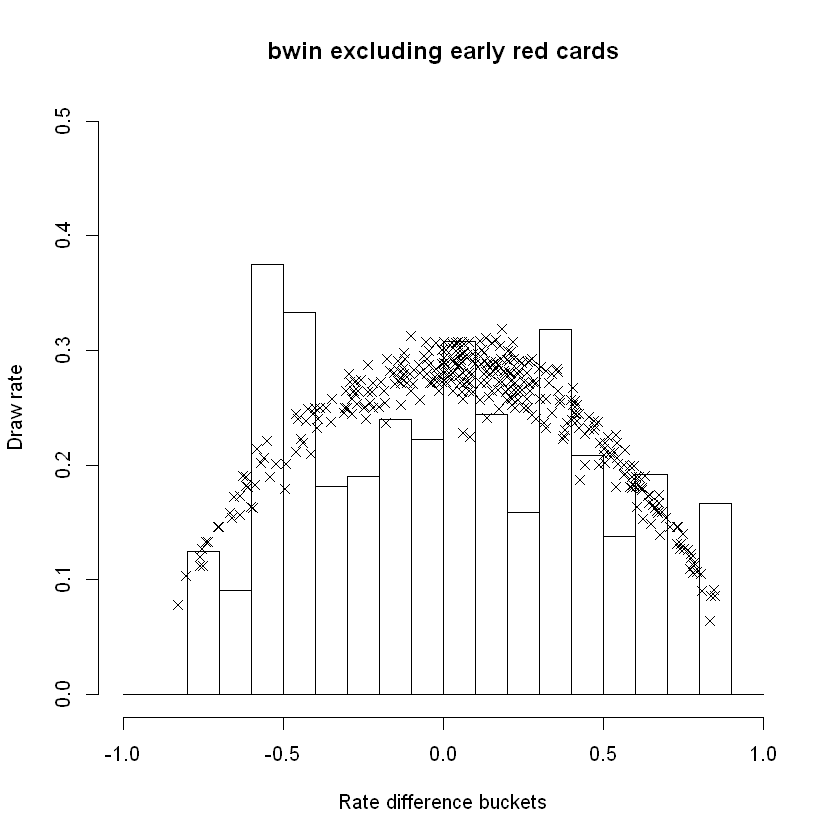

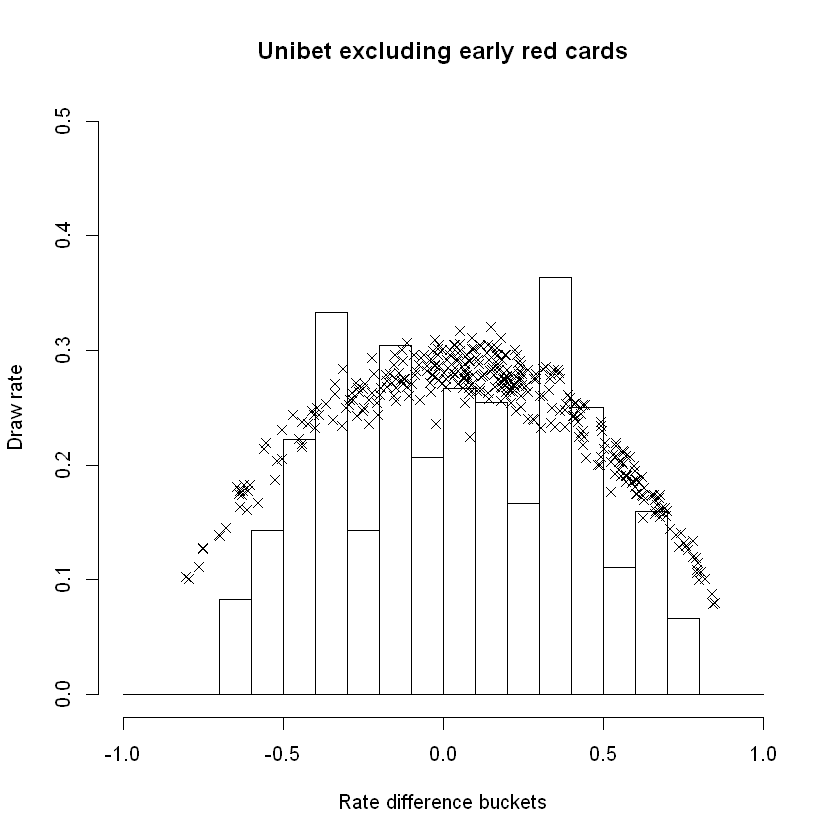

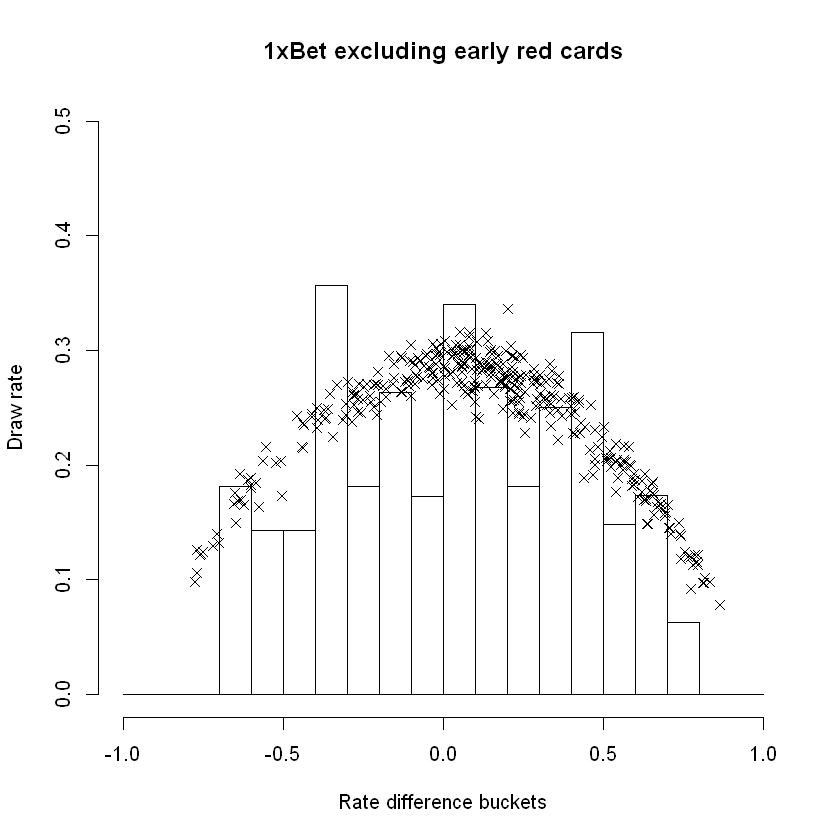

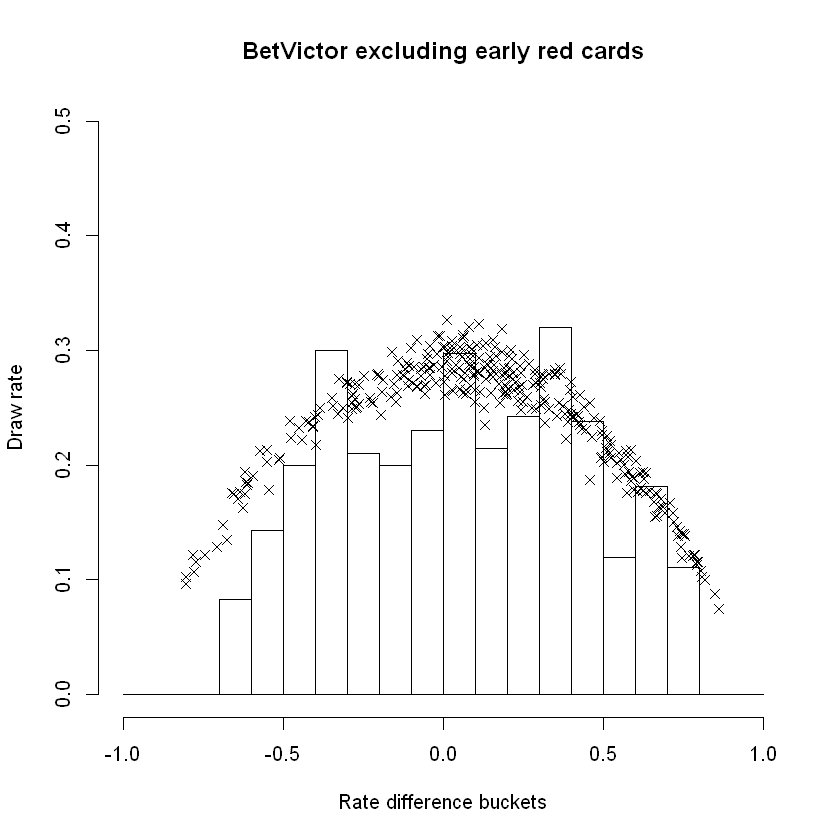

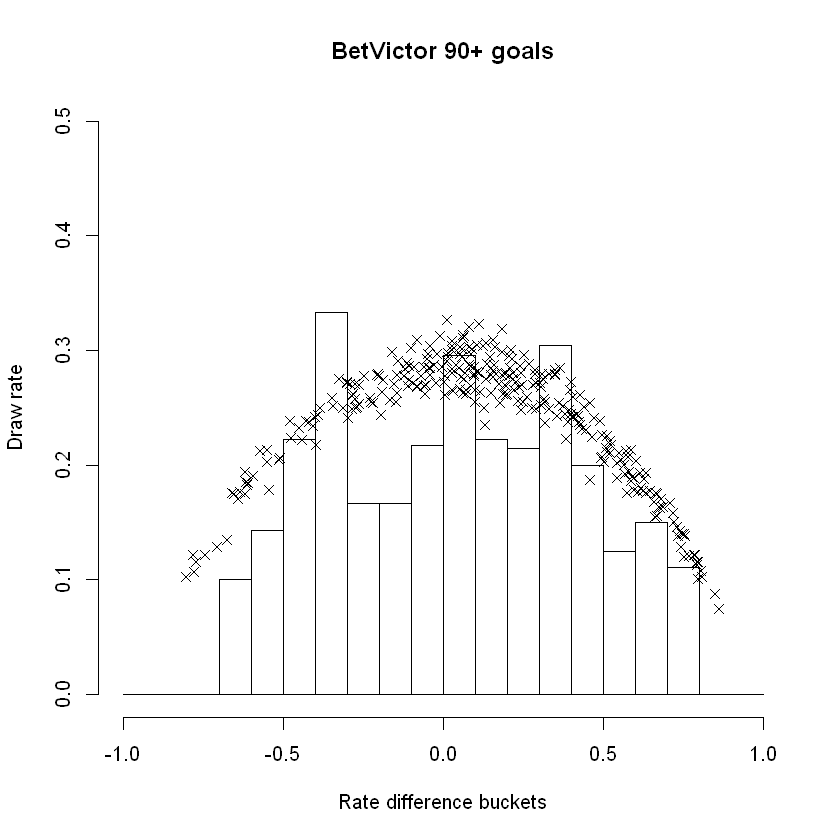

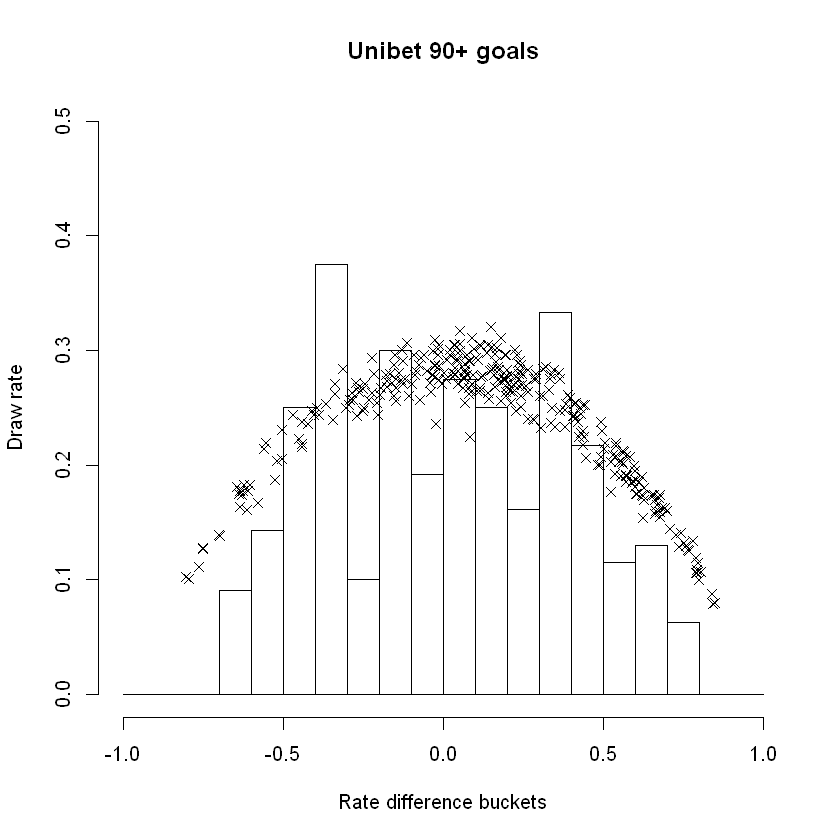

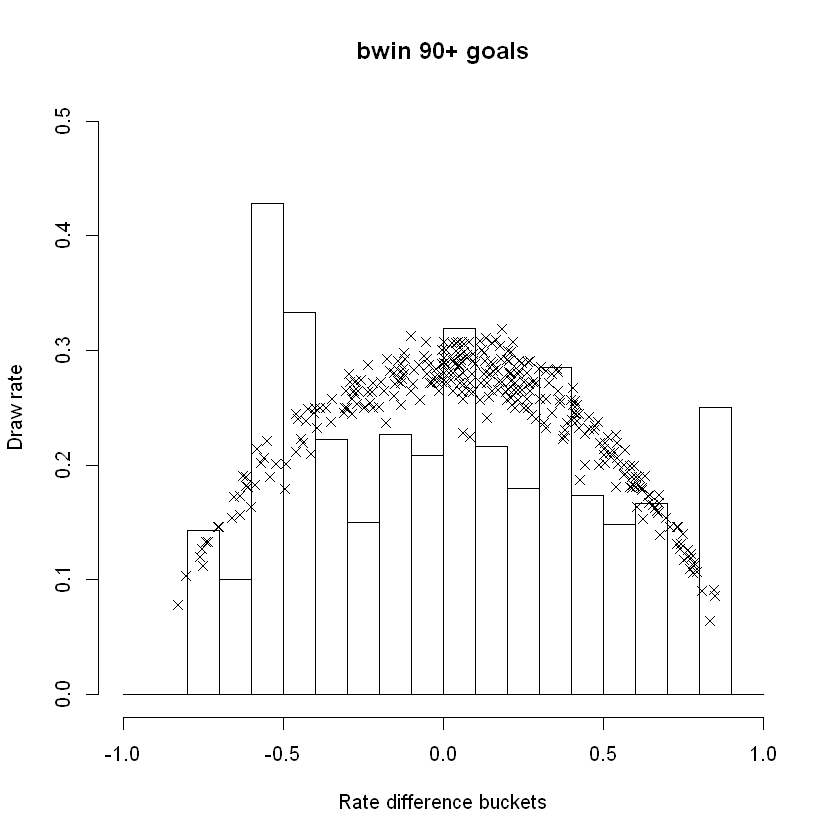

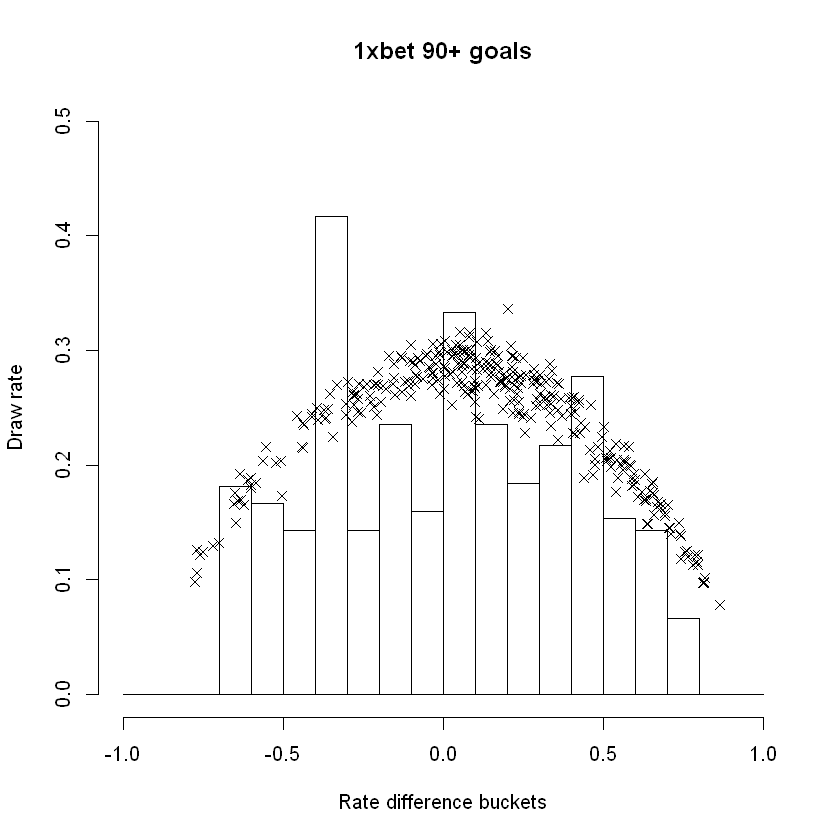

In [2]:
library(data.table)
matches <-data.table(read.csv("C:\\Users\\Linktera\\Desktop\\IE_582\\matches.csv", header = TRUE))
bets <-data.table(read.csv("C:\\Users\\Linktera\\Desktop\\IE_582\\bets.csv", header = TRUE))


matches <-matches[match_status=="Finished"&league_id==148]

hist(matches$match_hometeam_score,ylab="Number of Games",xlab="Home Goals", main= "Histogram of Matches",breaks=-1:8,ylim=c(0,250))
pois<-dpois(0:8, mean(matches$match_hometeam_score), log = FALSE) * nrow(matches)
lines(0:8,pois) 
hist(matches$match_awayteam_score,ylab="Number of Games",xlab="Away Goals", main= "Histogram of Matches",breaks=-1:8,ylim=c(0,250))
pois<-dpois(0:8, mean(matches$match_awayteam_score), log = FALSE) * nrow(matches)
lines(0:8,pois) 
hist(matches$match_hometeam_score-matches$match_awayteam_score,ylab="Number of Games",xlab="Home Goals-Away Goals", main= "Histogram of Matches")

### When we consider the occurance of the event goal, we can see that it has a suitable behaviour for poisson distribution since it has a memoriless property and it is a discrete event. Also when we plot the number of goals against number o match we can see the pattern exacltly fitts the shape of poisson distribution
### when we plot the lines acquired from poisson distribution constructed by the mean of the data we can see a clear match with real points and distribution.

bets1 <- bets[odd_bookmakers %in% c("bwin","Unibet","1xBet","BetVictor") & variable %in% c("odd_1","odd_2","odd_x")] 
bets1$rate = 1/bets1$value
bets1$match_id_date=paste(bets1$match_id ,bets1$odd_epoch)
root_bets_bwin <-bets1[odd_bookmakers =="bwin"]
root_bets_Unibet<-bets1[odd_bookmakers =="Unibet"]
root_bets_1xBet<-bets1[odd_bookmakers =="1xBet"]
root_bets_BetVictor<-bets1[odd_bookmakers =="BetVictor"]

#task 2
##task 2 bwin 

bets_bwin<-merge(root_bets_bwin,root_bets_bwin[,.(sumrate=sum(rate)),by = match_id_date])
bets_bwin$adj_rate= bets_bwin$rate/bets_bwin$sumrate
bets_bwin_odds= merge(bets_bwin[variable=="odd_1"],bets_bwin[variable=="odd_2"] ,by ="match_id_date")
bets_bwin_odds<-bets_bwin_odds[,c(1,2,9,17)]
colnames(bets_bwin_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_bwin_odds= merge(bets_bwin_odds,bets_bwin[variable=="odd_x"] ,by ="match_id_date")
bets_bwin_odds<-bets_bwin_odds[,c(2,3,4,12)]
colnames(bets_bwin_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_bwin_odds_with_results<-merge(bets_bwin_odds,match_results)

bets_bwin_odds_with_results$difference = bets_bwin_odds_with_results$adj_rate_home- bets_bwin_odds_with_results$adj_rate_away
bwin_rate_diff_for_tie<- bets_bwin_odds_with_results[result==0]
h<-hist(bwin_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_bwin_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="bwin",xlab="Rate difference buckets",ylab = "Draw rate")
lines(bets_bwin_odds_with_results$diff,bets_bwin_odds_with_results$adj_rate_tie,type="p",pch =4)

##task 2 Unibet 
bets_Unibet<-merge(root_bets_Unibet,root_bets_Unibet[,.(sumrate=sum(rate)),by = match_id_date])
bets_Unibet$adj_rate= bets_Unibet$rate/bets_Unibet$sumrate
bets_Unibet_odds= merge(bets_Unibet[variable=="odd_1"],bets_Unibet[variable=="odd_2"] ,by ="match_id_date")
bets_Unibet_odds<-bets_Unibet_odds[,c(1,2,9,17)]
colnames(bets_Unibet_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_Unibet_odds= merge(bets_Unibet_odds,bets_Unibet[variable=="odd_x"] ,by ="match_id_date")
bets_Unibet_odds<-bets_Unibet_odds[,c(2,3,4,12)]
colnames(bets_Unibet_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_Unibet_odds_with_results<-merge(bets_Unibet_odds,match_results)

bets_Unibet_odds_with_results$difference = bets_Unibet_odds_with_results$adj_rate_home- bets_Unibet_odds_with_results$adj_rate_away
Unibet_rate_diff_for_tie<- bets_Unibet_odds_with_results[result==0]
h<-hist(Unibet_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_Unibet_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="Unibet",xlab="Rate difference buckets",ylab = "Draw rate")
lines(bets_Unibet_odds_with_results$diff,bets_Unibet_odds_with_results$adj_rate_tie,type="p",pch =4)

##task 2 1xbet 
bets_1xBet<-merge(root_bets_1xBet,root_bets_1xBet[,.(sumrate=sum(rate)),by = match_id_date])
bets_1xBet$adj_rate= bets_1xBet$rate/bets_1xBet$sumrate
bets_1xBet_odds= merge(bets_1xBet[variable=="odd_1"],bets_1xBet[variable=="odd_2"] ,by ="match_id_date")
bets_1xBet_odds<-bets_1xBet_odds[,c(1,2,9,17)]
colnames(bets_1xBet_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_1xBet_odds= merge(bets_1xBet_odds,bets_1xBet[variable=="odd_x"] ,by ="match_id_date")
bets_1xBet_odds<-bets_1xBet_odds[,c(2,3,4,12)]
colnames(bets_1xBet_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_1xBet_odds_with_results<-merge(bets_1xBet_odds,match_results)

bets_1xBet_odds_with_results$difference = bets_1xBet_odds_with_results$adj_rate_home- bets_1xBet_odds_with_results$adj_rate_away
x1xBet_rate_diff_for_tie<- bets_1xBet_odds_with_results[result==0]
h<-hist(x1xBet_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_1xBet_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="1xBet",xlab="Rate difference buckets",ylab = "Draw rate")
lines(bets_1xBet_odds_with_results$diff,bets_1xBet_odds_with_results$adj_rate_tie,type="p",pch =4)

##task 2 Betvictor 
bets_BetVictor<-merge(root_bets_BetVictor,root_bets_BetVictor[,.(sumrate=sum(rate)),by = match_id_date])
bets_BetVictor$adj_rate= bets_BetVictor$rate/bets_BetVictor$sumrate
bets_BetVictor_odds= merge(bets_BetVictor[variable=="odd_1"],bets_BetVictor[variable=="odd_2"] ,by ="match_id_date")
bets_BetVictor_odds<-bets_BetVictor_odds[,c(1,2,9,17)]
colnames(bets_BetVictor_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_BetVictor_odds= merge(bets_BetVictor_odds,bets_BetVictor[variable=="odd_x"] ,by ="match_id_date")
bets_BetVictor_odds<-bets_BetVictor_odds[,c(2,3,4,12)]
colnames(bets_BetVictor_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_BetVictor_odds_with_results<-merge(bets_BetVictor_odds,match_results)

bets_BetVictor_odds_with_results$difference = bets_BetVictor_odds_with_results$adj_rate_home- bets_BetVictor_odds_with_results$adj_rate_away
BetVictor_rate_diff_for_tie<- bets_BetVictor_odds_with_results[result==0]
h<-hist(BetVictor_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_BetVictor_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="BetVictor",xlab="Rate difference buckets",ylab = "Draw rate")
lines(bets_BetVictor_odds_with_results$diff,bets_BetVictor_odds_with_results$adj_rate_tie,type="p",pch =4)

### when we look at the plots for all 4 of the bet companies we can see that they are good at estimating the probability when they consider the teams as equal competitors (0 rate difference)
### However around 0.5 probability difference we can see that all 4 companies didn't perform well especially bwin when considers away team as stronger competitor and unibet vice-versa


#task 3 nored card 

booking <-data.table(read.csv("C:\\Users\\Linktera\\Desktop\\IE_582\\booking.csv", header = TRUE))
booking$adj_time = sub("\\+.*", "", booking$time)
booking_earlyred<-booking[card=="red card"&adj_time<30]
root_bets_bwin2<-merge(root_bets_bwin,booking_earlyred,all.x=1)
root_bets_bwin_nored<-root_bets_bwin2[is.na(card),c(1:7)]
root_bets_Unibet2<-merge(root_bets_Unibet,booking_earlyred,all.x=1)
root_bets_Unibet_nored<-root_bets_Unibet2[is.na(card),c(1:7)]
root_bets_1xBet2<-merge(root_bets_1xBet,booking_earlyred,all.x=1)
root_bets_1xBet_nored<-root_bets_1xBet2[is.na(card),c(1:7)]
root_bets_BetVictor2<-merge(root_bets_BetVictor,booking_earlyred,all.x=1)
root_bets_BetVictor_nored<-root_bets_BetVictor2[is.na(card),c(1:7)]


##task 3 nored card bwin
bets_bwin<-merge(root_bets_bwin_nored,root_bets_bwin_nored[,.(sumrate=sum(rate)),by = match_id_date],by ="match_id_date")
bets_bwin$adj_rate= bets_bwin$rate/bets_bwin$sumrate
bets_bwin_odds= merge(bets_bwin[variable=="odd_1"],bets_bwin[variable=="odd_2"] ,by ="match_id_date")
bets_bwin_odds<-bets_bwin_odds[,c(1,2,9,17)]
colnames(bets_bwin_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_bwin_odds= merge(bets_bwin_odds,bets_bwin[variable=="odd_x"] ,by ="match_id_date")
bets_bwin_odds<-bets_bwin_odds[,c(2,3,4,12)]
colnames(bets_bwin_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_bwin_odds_with_results<-merge(bets_bwin_odds,match_results)

bets_bwin_odds_with_results$difference = bets_bwin_odds_with_results$adj_rate_home- bets_bwin_odds_with_results$adj_rate_away
bwin_rate_diff_for_tie<- bets_bwin_odds_with_results[result==0]
h<-hist(bwin_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_bwin_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="bwin excluding early red cards",xlab="Rate difference buckets",ylab = "Draw rate")

lines(bets_bwin_odds_with_results$diff,bets_bwin_odds_with_results$adj_rate_tie,type="p",pch =4)

##task 3 nored card Unibet

bets_Unibet<-merge(root_bets_Unibet_nored,root_bets_Unibet_nored[,.(sumrate=sum(rate)),by = match_id_date],by ="match_id_date")
bets_Unibet$adj_rate= bets_Unibet$rate/bets_Unibet$sumrate
bets_Unibet_odds= merge(bets_Unibet[variable=="odd_1"],bets_Unibet[variable=="odd_2"] ,by ="match_id_date")
bets_Unibet_odds<-bets_Unibet_odds[,c(1,2,9,17)]
colnames(bets_Unibet_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_Unibet_odds= merge(bets_Unibet_odds,bets_Unibet[variable=="odd_x"] ,by ="match_id_date")
bets_Unibet_odds<-bets_Unibet_odds[,c(2,3,4,12)]
colnames(bets_Unibet_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_Unibet_odds_with_results<-merge(bets_Unibet_odds,match_results)

bets_Unibet_odds_with_results$difference = bets_Unibet_odds_with_results$adj_rate_home- bets_Unibet_odds_with_results$adj_rate_away
Unibet_rate_diff_for_tie<- bets_Unibet_odds_with_results[result==0]
h<-hist(Unibet_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_Unibet_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="Unibet excluding early red cards",xlab="Rate difference buckets",ylab = "Draw rate")

lines(bets_Unibet_odds_with_results$diff,bets_Unibet_odds_with_results$adj_rate_tie,type="p",pch =4)

##task 3 nored card 1xbet

bets_1xBet<-merge(root_bets_1xBet_nored,root_bets_1xBet_nored[,.(sumrate=sum(rate)),by = match_id_date],by ="match_id_date")
bets_1xBet$adj_rate= bets_1xBet$rate/bets_1xBet$sumrate
bets_1xBet_odds= merge(bets_1xBet[variable=="odd_1"],bets_1xBet[variable=="odd_2"] ,by ="match_id_date")
bets_1xBet_odds<-bets_1xBet_odds[,c(1,2,9,17)]
colnames(bets_1xBet_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_1xBet_odds= merge(bets_1xBet_odds,bets_1xBet[variable=="odd_x"] ,by ="match_id_date")
bets_1xBet_odds<-bets_1xBet_odds[,c(2,3,4,12)]
colnames(bets_1xBet_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_1xBet_odds_with_results<-merge(bets_1xBet_odds,match_results)

bets_1xBet_odds_with_results$difference = bets_1xBet_odds_with_results$adj_rate_home- bets_1xBet_odds_with_results$adj_rate_away
x1xBet_rate_diff_for_tie<- bets_1xBet_odds_with_results[result==0]
h<-hist(x1xBet_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_1xBet_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="1xBet excluding early red cards",xlab="Rate difference buckets",ylab = "Draw rate")

lines(bets_1xBet_odds_with_results$diff,bets_1xBet_odds_with_results$adj_rate_tie,type="p",pch =4)



##task 3 nored card Betvictor

bets_BetVictor<-merge(root_bets_BetVictor_nored,root_bets_BetVictor_nored[,.(sumrate=sum(rate)),by = match_id_date],by ="match_id_date")
bets_BetVictor$adj_rate= bets_BetVictor$rate/bets_BetVictor$sumrate
bets_BetVictor_odds= merge(bets_BetVictor[variable=="odd_1"],bets_BetVictor[variable=="odd_2"] ,by ="match_id_date")
bets_BetVictor_odds<-bets_BetVictor_odds[,c(1,2,9,17)]
colnames(bets_BetVictor_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_BetVictor_odds= merge(bets_BetVictor_odds,bets_BetVictor[variable=="odd_x"] ,by ="match_id_date")
bets_BetVictor_odds<-bets_BetVictor_odds[,c(2,3,4,12)]
colnames(bets_BetVictor_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_BetVictor_odds_with_results<-merge(bets_BetVictor_odds,match_results)

bets_BetVictor_odds_with_results$difference = bets_BetVictor_odds_with_results$adj_rate_home- bets_BetVictor_odds_with_results$adj_rate_away
BetVictor_rate_diff_for_tie<- bets_BetVictor_odds_with_results[result==0]
h<-hist(BetVictor_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_BetVictor_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="BetVictor excluding early red cards",xlab="Rate difference buckets",ylab = "Draw rate")

lines(bets_BetVictor_odds_with_results$diff,bets_BetVictor_odds_with_results$adj_rate_tie,type="p",pch =4)



#task 3 no 90+ 
goals <-data.table(read.csv("C:\\Users\\Linktera\\Desktop\\IE_582\\goals.csv", header = TRUE))
matches_with_90p<-unique(goals[grepl('90+.',time),match_id])

##task 3 no 90+ Betvictor
bets_BetVictor<-merge(root_bets_BetVictor,root_bets_BetVictor[,.(sumrate=sum(rate)),by = match_id_date])
bets_BetVictor$adj_rate= bets_BetVictor$rate/bets_BetVictor$sumrate
bets_BetVictor_odds= merge(bets_BetVictor[variable=="odd_1"],bets_BetVictor[variable=="odd_2"] ,by ="match_id_date")
bets_BetVictor_odds<-bets_BetVictor_odds[,c(1,2,9,17)]
colnames(bets_BetVictor_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_BetVictor_odds= merge(bets_BetVictor_odds,bets_BetVictor[variable=="odd_x"] ,by ="match_id_date")
bets_BetVictor_odds<-bets_BetVictor_odds[,c(2,3,4,12)]
colnames(bets_BetVictor_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_BetVictor_odds_with_results<-merge(bets_BetVictor_odds,match_results)

bets_BetVictor_odds_with_results$difference = bets_BetVictor_odds_with_results$adj_rate_home- bets_BetVictor_odds_with_results$adj_rate_away

bets_BetVictor_odds_with_results<-bets_BetVictor_odds_with_results[!(match_id %in% matches_with_90p)]

BetVictor_rate_diff_for_tie<- bets_BetVictor_odds_with_results[result==0]

h<-hist(BetVictor_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_BetVictor_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="BetVictor 90+ goals",xlab="Rate difference buckets",ylab = "Draw rate")
lines(bets_BetVictor_odds_with_results$diff,bets_BetVictor_odds_with_results$adj_rate_tie,type="p",pch =4)


##task 3 no 90+ Unibet

bets_Unibet<-merge(root_bets_Unibet,root_bets_Unibet[,.(sumrate=sum(rate)),by = match_id_date])
bets_Unibet$adj_rate= bets_Unibet$rate/bets_Unibet$sumrate
bets_Unibet_odds= merge(bets_Unibet[variable=="odd_1"],bets_Unibet[variable=="odd_2"] ,by ="match_id_date")
bets_Unibet_odds<-bets_Unibet_odds[,c(1,2,9,17)]
colnames(bets_Unibet_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_Unibet_odds= merge(bets_Unibet_odds,bets_Unibet[variable=="odd_x"] ,by ="match_id_date")
bets_Unibet_odds<-bets_Unibet_odds[,c(2,3,4,12)]
colnames(bets_Unibet_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_Unibet_odds_with_results<-merge(bets_Unibet_odds,match_results)

bets_Unibet_odds_with_results$difference = bets_Unibet_odds_with_results$adj_rate_home- bets_Unibet_odds_with_results$adj_rate_away

bets_Unibet_odds_with_results<-bets_Unibet_odds_with_results[!(match_id %in% matches_with_90p)]
Unibet_rate_diff_for_tie<- bets_Unibet_odds_with_results[result==0]

h<-hist(Unibet_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_Unibet_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="Unibet 90+ goals",xlab="Rate difference buckets",ylab = "Draw rate")

lines(bets_Unibet_odds_with_results$diff,bets_Unibet_odds_with_results$adj_rate_tie,type="p",pch =4)


##task 3 no 90+ bwin

bets_bwin<-merge(root_bets_bwin,root_bets_bwin[,.(sumrate=sum(rate)),by = match_id_date])
bets_bwin$adj_rate= bets_bwin$rate/bets_bwin$sumrate
bets_bwin_odds= merge(bets_bwin[variable=="odd_1"],bets_bwin[variable=="odd_2"] ,by ="match_id_date")
bets_bwin_odds<-bets_bwin_odds[,c(1,2,9,17)]
colnames(bets_bwin_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_bwin_odds= merge(bets_bwin_odds,bets_bwin[variable=="odd_x"] ,by ="match_id_date")
bets_bwin_odds<-bets_bwin_odds[,c(2,3,4,12)]
colnames(bets_bwin_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_bwin_odds_with_results<-merge(bets_bwin_odds,match_results)

bets_bwin_odds_with_results$difference = bets_bwin_odds_with_results$adj_rate_home- bets_bwin_odds_with_results$adj_rate_away

bets_bwin_odds_with_results<-bets_bwin_odds_with_results[!(match_id %in% matches_with_90p)]

bwin_rate_diff_for_tie<- bets_bwin_odds_with_results[result==0]

h<-hist(bwin_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_bwin_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="bwin 90+ goals",xlab="Rate difference buckets",ylab = "Draw rate")

lines(bets_bwin_odds_with_results$diff,bets_bwin_odds_with_results$adj_rate_tie,type="p",pch =4)



##task 3 no 90+ 1xbet

bets_1xBet<-merge(root_bets_1xBet,root_bets_1xBet[,.(sumrate=sum(rate)),by = match_id_date])
bets_1xBet$adj_rate= bets_1xBet$rate/bets_1xBet$sumrate
bets_1xBet_odds= merge(bets_1xBet[variable=="odd_1"],bets_1xBet[variable=="odd_2"] ,by ="match_id_date")
bets_1xBet_odds<-bets_1xBet_odds[,c(1,2,9,17)]
colnames(bets_1xBet_odds)<-c("match_id_date","match_id","adj_rate_home","adj_rate_away")
bets_1xBet_odds= merge(bets_1xBet_odds,bets_1xBet[variable=="odd_x"] ,by ="match_id_date")
bets_1xBet_odds<-bets_1xBet_odds[,c(2,3,4,12)]
colnames(bets_1xBet_odds)<-c("match_id","adj_rate_home","adj_rate_away","adj_rate_tie")
match_results<-matches
match_results$result=ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score>0,1,ifelse(match_results$match_hometeam_score -match_results$match_awayteam_score<0,2,0))
match_results<-match_results[,c(3,18)]
bets_1xBet_odds_with_results<-merge(bets_1xBet_odds,match_results)

bets_1xBet_odds_with_results$difference = bets_1xBet_odds_with_results$adj_rate_home- bets_1xBet_odds_with_results$adj_rate_away

bets_1xBet_odds_with_results<-bets_1xBet_odds_with_results[!(match_id %in% matches_with_90p)]

x1xBet_rate_diff_for_tie<- bets_1xBet_odds_with_results[result==0]
h<-hist(x1xBet_rate_diff_for_tie$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h_res<-hist(bets_1xBet_odds_with_results$difference,breaks=seq(-1,1 ,by=0.1),plot=0)
h$counts=h$counts/h_res$counts
h$counts[is.nan(h$counts)] <- 0
plot(h,ylim=c(0,0.5),main="1xbet 90+ goals",xlab="Rate difference buckets",ylab = "Draw rate")

lines(bets_1xBet_odds_with_results$diff,bets_1xBet_odds_with_results$adj_rate_tie,type="p",pch =4)

### when we compare the results the plots with filtered data for early given redcards and goals occured in  extra time we cannot see any significant improvement in fitting
### actually considering the plot where we exlude goals in 90+ we can see a worse performance for some companies  

